# Generating Plots for the Paper

In [1]:
kwargs = {
    'sym' : '',
    'whis' : [5,95]
}

figures_dir = '/Users/peterwills/google-drive/Research/Graph Distance Study/metrics_paper/figures'

labels = ['Edit', 'Resistance', 'DeltaCon', 'NetSimile', '$\lambda^\mathbf{A}$',
          '$\lambda^\mathbf{L}$', '$\lambda^\mathbf{\cal L}$']

# Functions for Plotting

These functions plot our data, starting with a pickled data dictionary.

In [2]:
SIZE = 14

def plot(path,title='',save=False,filename=None):
    """Plots data contained in data dictionary, for matrix and spectral distances.
    
    If save = True, then a filename must be provided
    
    Data unpacking is based on particular data format, see scripts in data_scripts 
    directory for examples.
    """

    data_dict = pd.read_pickle(path)

    adj_null = data_dict['results_df_null']['Adjacency Distances'].T
    adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

    for item in [adj_null,adj_not]:
        item.index = range(item.shape[0])

    adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

    plt.figure(figsize=(6,4))
    adj_scaled.boxplot(**kwargs);
    plt.ylabel('Scaled Distance $\widehat{D}_1$',color='k',size=SIZE);
    plt.yticks(color='k');
    plt.xticks(range(1,len(labels)+1),labels,rotation=90,color='k',size=SIZE);
    plt.title(title,size=SIZE);

    if save:
        fig = plt.gcf();
        fig.savefig(os.path.join(figures_dir,filename),dpi=300,bbox_inches='tight');

def plot_lambda_k(path,k_list,title='',scale=1,shift=-0.07,figsize=(6,4),
                  save=False,filename=None,y_lim=None):

    data_dict = pd.read_pickle(path)

    adj_null = data_dict['results_df_null']['Adjacency Distances'].T
    adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

    for item in [adj_null,adj_not]:
        item.index = range(item.shape[0])

    adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

    N = len(adj_scaled.columns)

    indices = list(range(0,N,3)) + list(range(1,N,3)) + list(range(2,N,3))
    adj_scaled = adj_scaled.iloc[:,indices]

    # we don't need k = 1 for Laplacian distances
    del adj_scaled['Lambda (Laplacian, k=1)']
    del adj_scaled['Lambda (Normalized Laplacian, k=1)']

    m = len(k_list)

    # we don't need k = 1 for Laplacian distances
    num_labels = k_list + k_list[1:] * 2

    plt.figure(figsize=figsize);
    adj_scaled.boxplot(**kwargs);
    plt.ylabel('Scaled Distance $\widehat{D}_1$',color='k',size=SIZE);
    plt.xlabel('Number of Eigenvalues $k$',color='k',size=SIZE)
    plt.xticks(range(1,len(num_labels)+1),num_labels,color='k');
    plt.yticks(color='k')
    plt.title(title,size=SIZE);
    plt.axvline(m + 0.5);
    plt.axvline(2*m - 0.5);

    axes = plt.gca()
    y_min,y_max = axes.get_ylim()
    scale = 1.1
    y_max = y_max*scale
    if y_lim is not None:
        y_min,y_max = y_lim
    y_ran = y_max - y_min
    shift = -0.1
    plt.ylim([y_min,y_max])

    plt.text(m/2 + 1, y_max + shift*y_ran, '$\lambda^\mathbf{A}$', horizontalalignment='center',size=SIZE+2)
    plt.text(3/2*m, y_max + shift*y_ran, '$\lambda^\mathbf{L}$', horizontalalignment='center',size=SIZE+2)
    plt.text(5/2*m - 1, y_max + shift*y_ran, '$\lambda^\mathbf{\cal{L}}$', horizontalalignment='center',size=SIZE+2)

    if save:
        fig = plt.gcf();
        fig.savefig(os.path.join(figures_dir,filename),dpi=300,bbox_inches='tight');

## Stochastic Blockmodel

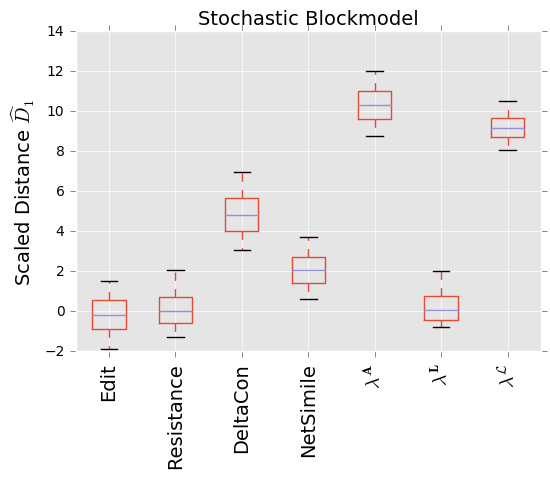

In [3]:
plot('pickled_data/SBM_vs_uncorr.p',title = 'Stochastic Blockmodel',save = True,filename = 'sbm.pdf')

## SBM 3-community

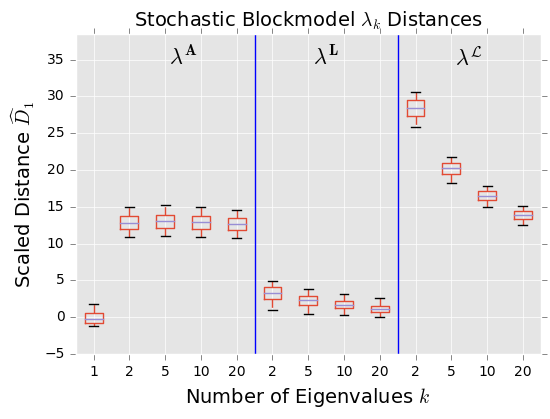

In [4]:
path = 'pickled_data/SBM_vs_uncorr_lambda_k_l2.p'
title = 'Stochastic Blockmodel $\lambda_k$ Distances'
filename = 'sbm_k.pdf'
k_list = [1,2,5,10,20]

plot_lambda_k(path,k_list,title=title,scale=1.1,save=True,filename=filename)

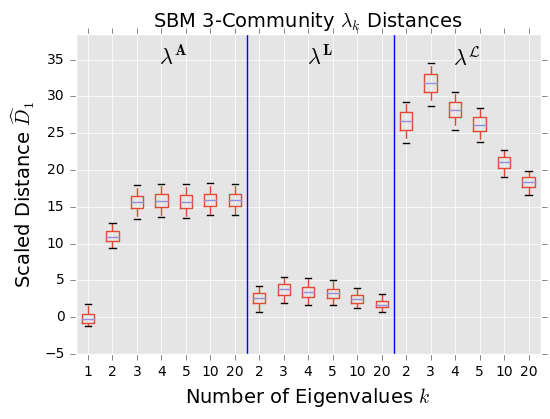

In [5]:
path = 'pickled_data/SBM_vs_uncorr_lambda_k_l3.p'
title = 'SBM 3-Community $\lambda_k$ Distances'
filename = 'sbm_3_k.pdf'
k_list = [1,2,3,4,5,10,20]

plot_lambda_k(path,k_list,title=title,scale=1.1,save=True,filename=filename)

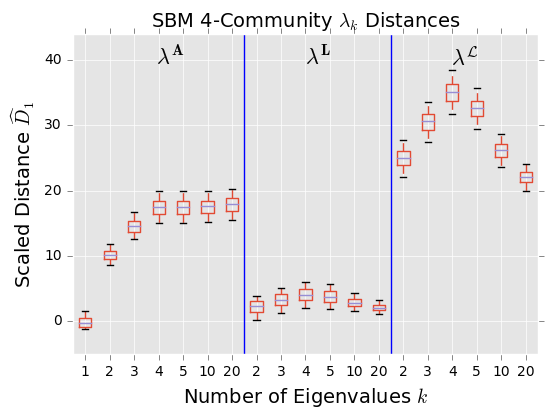

In [6]:
path = 'pickled_data/SBM_vs_uncorr_lambda_k_l4.p'
title = 'SBM 4-Community $\lambda_k$ Distances'
filename = 'sbm_4_k.pdf'
k_list = [1,2,3,4,5,10,20]

plot_lambda_k(path,k_list,title=title,scale=1.1,save=True,filename=filename)

## Preferential Attachment

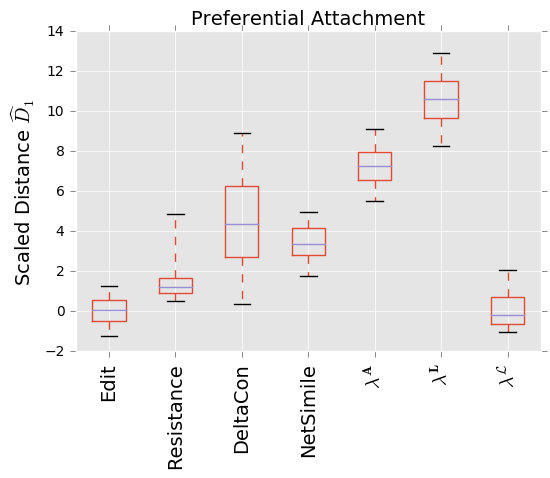

In [7]:
plot('pickled_data/PA_vs_uncorr.p',
     title = 'Preferential Attachment',
     save = True,
     filename = 'pref_att.pdf')

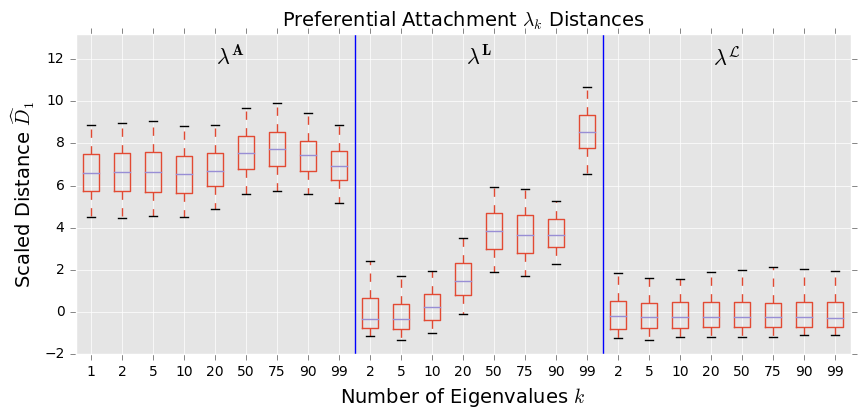

In [8]:
path = 'pickled_data/PA_vs_uncorr_lambdak.p'
title = 'Preferential Attachment $\lambda_k$ Distances'
filename = 'pref_att_k.pdf'
k_list = [1,2,5,10,20,50,75,90,99]
figsize = [10,4]

plot_lambda_k(path,k_list,title=title,scale=1.1,save=True,filename=filename,
             figsize=figsize)

# Pref Attachment vs Random Degree Distribution

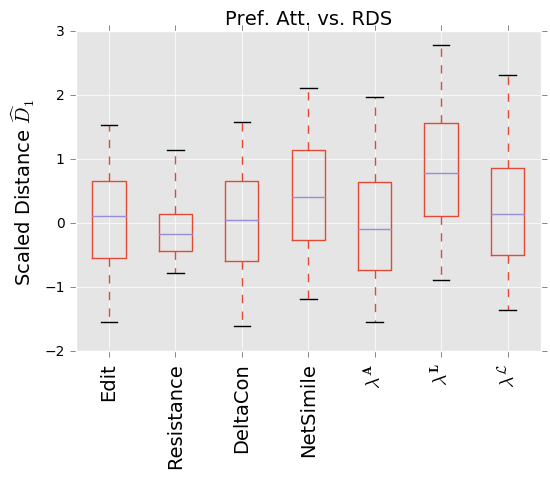

In [9]:
plot('pickled_data/PA_vs_randDS.p',
     title = 'Pref. Att. vs. RDS',
     save = True,
     filename = 'degmatched_pa.pdf')

# Small World

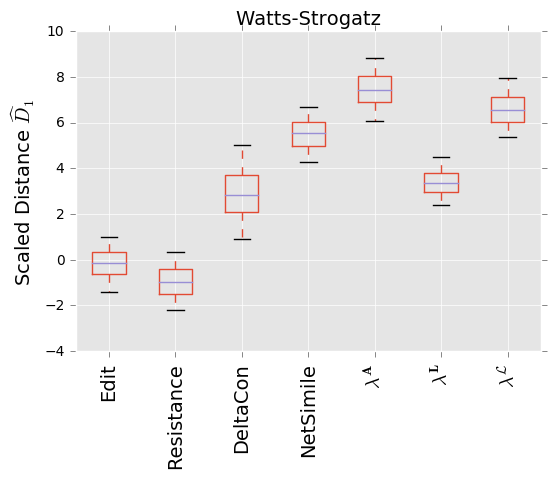

In [10]:
plot('pickled_data/watts_vs_uncorr.p',
     title = 'Watts-Strogatz',
     save = True,
     filename = 'small_world.pdf')

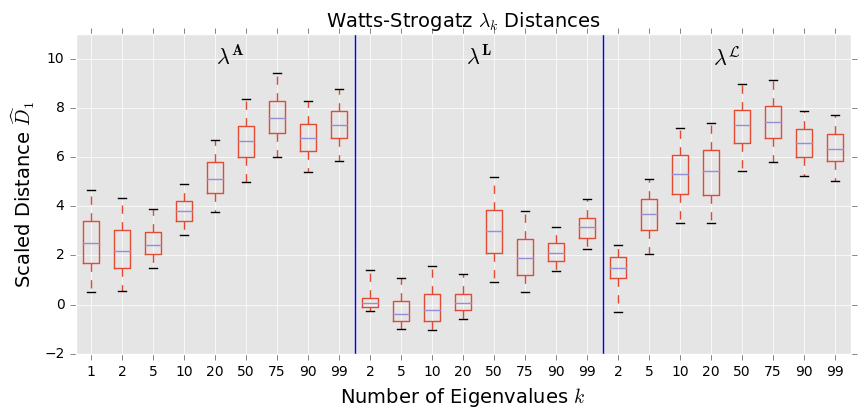

In [11]:
path = 'pickled_data/watts_vs_uncorr_lambda_k.p'
title = 'Watts-Strogatz $\lambda_k$ Distances'
filename = 'small_world_k.pdf'
k_list = [1,2,5,10,20,50,75,90,99]
figsize = [10,4]

plot_lambda_k(path,k_list,title=title,scale=1.1,save=True,filename=filename,
             figsize=figsize)

# Lattics vs Random Degree-Distr Graph

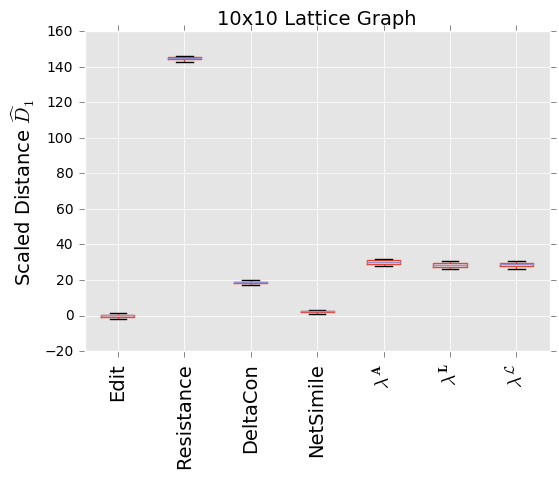

In [12]:
plot('pickled_data/lattice_vs_randDS_10x10.p',
     title = '10x10 Lattice Graph',
     save = True,
     filename = 'lattice.pdf')

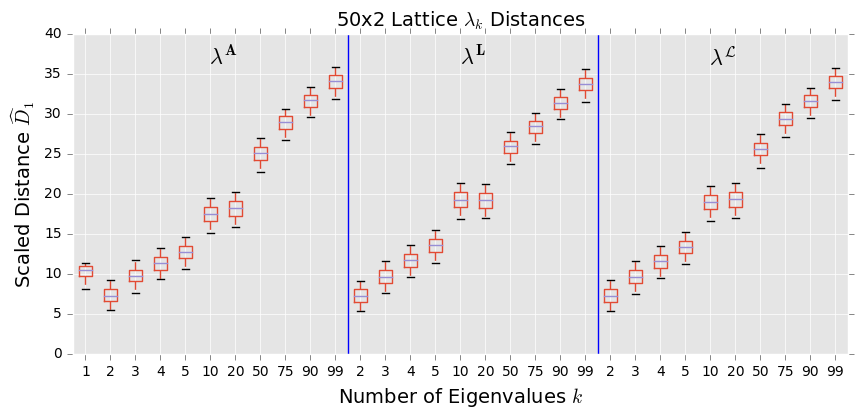

In [13]:
path = 'pickled_data/lattice_vs_randDS_lambda_k_50x2.p'
title = '50x2 Lattice $\lambda_k$ Distances'
filename = 'lattice_skinny_k.pdf'
k_list = [1,2,3,4,5,10,20,50,75,90,99]

plot_lambda_k(path,k_list,title=title,figsize=(10,4),save=True,filename=filename,y_lim=[0,40])

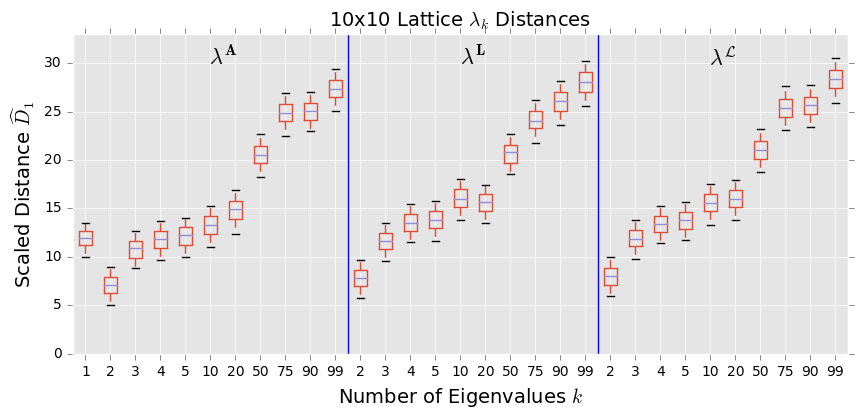

In [14]:
path = 'pickled_data/lattice_vs_randDS_lambda_k_10x10.p'
title = '10x10 Lattice $\lambda_k$ Distances'
filename = 'lattice_k.pdf'
k_list = [1,2,3,4,5,10,20,50,75,90,99]

plot_lambda_k(path,k_list,title=title,figsize=(10,4),save=True,filename=filename,y_lim = [0,33])

# All k for Lattice

In [15]:
path = 'pickled_data/lattics_vs_randDS_lambda_k_all.p'
title = '10x10 Lattice $\lambda_k$ Distances'
filename = 'lattice_skinny_k.pdf'
k_list = list(range(1,100))

data_dict = pd.read_pickle(path)

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

N = len(adj_scaled.columns)

indices = list(range(0,N,3)) + list(range(1,N,3)) + list(range(2,N,3))
adj_scaled = adj_scaled.iloc[:,indices]

# we don't need k = 1 for Laplacian distances
del adj_scaled['Lambda (Laplacian, k=1)']
del adj_scaled['Lambda (Normalized Laplacian, k=1)']

In [16]:
lamA_cols = [col for col in adj_scaled.columns if "Adjacency" in col]
lamNL_cols = [col for col in adj_scaled.columns if "Normalized Laplacian" in col]
lamL_cols = [col for col in adj_scaled.columns if "(Laplacian" in col]

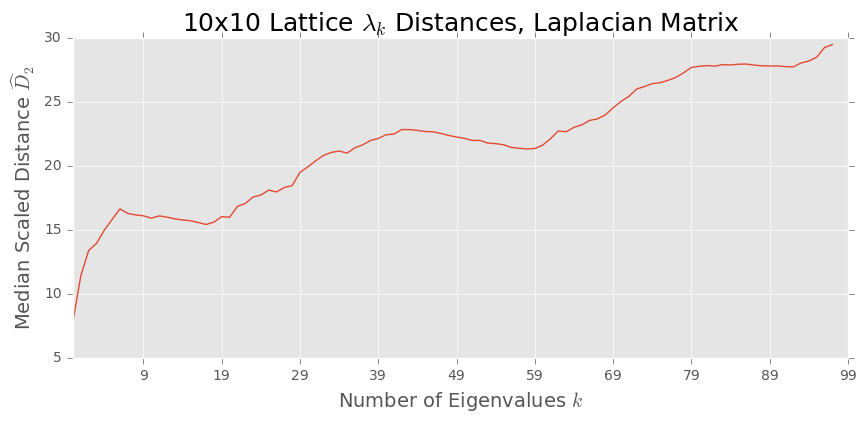

In [17]:
plt.figure(figsize=(10,4));
adj_scaled[lamL_cols].median().plot();
# adj_scaled[lamL_cols].boxplot(**kwargs); # too many boxes, not enough info
plt.ylabel('Median Scaled Distance $\widehat{D}_2$');
plt.xlabel('Number of Eigenvalues $k$')
plt.xticks(np.arange(9,109,10),np.arange(9,109,10));
plt.title('10x10 Lattice $\lambda_{k}$ Distances, Laplacian Matrix');